<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/log/P1-P5_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

# Import Keras modules

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


In [25]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/Colab')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['Data', 'Model', 'Data_']

In [0]:
# Set data directories

dataPath = 'gdrive/My Drive/Colab/Data'

# Changed variable names to normal and fault
# Changed variable names from folder to path
# Need to consider multiple folders
# Need to add files to be tested

#folderNormal = ['A1F3P3']
folderNormal = list()

for x in range(1, 6):
    for y in range(1, 6):
        for z in range(1, 2):
            #if (x <= 2 and y <= 2 and z <= 2):
            folderNormal.append('A{}F{}P{}'.format(x, y, z))

folderFault = list()

# folderFault = ['A5F3P3']

for x in range(1, 6):
    for y in range(1, 6):
        for z in range(5, 6):
            #if (x == 5 or y == 5 or z == 5):
            folderFault.append('A{}F{}P{}'.format(x, y, z))


pathNormal = list()
pathFault = list()

for i in range(len(folderNormal)):
    pathNormal.append(dataPath + '/' + folderNormal[i])
    
for i in range(len(folderFault)):
    pathFault.append(dataPath + '/' + folderFault[i])

In [0]:
# Specgram settings

nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

# pretrainedModel = 'VGG19'
# pretrainedModel = 'Xception'
# pretrainedModel = 'ResNet50'

# pretrainedModel = 'VGG19'
pretrainedModel = 'InceptionV3'
#pretrainedModel = 'DenseNet169'
#pretrainedModel = 'DenseNet201'


lastActivation = 'softmax'
sizeBatch = 4
numEpochs = 16
verb = 1


# Learning parameters

trainingRatio = 0.8

totalDataNum = 1000
repeat = 1

In [28]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathNormal)))

for i in range(startNum, len(pathNormal)):

    npyTestPath = glob.glob(pathNormal[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]

    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListNormal = label
        imgsNormal = imgs
    else:
        labelListNormal = np.vstack([labelListNormal, label])
        imgsNormal = np.vstack([imgsNormal, imgs])

    print('Normal Image Shape From {}: {}:'.format(pathNormal[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))    
    
    
print('Normal Image Shape: {}'.format(imgsNormal.shape))


Normal Image Shape From gdrive/My Drive/Colab/Data/A1F1P1: 1000:
Selected 40/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F2P1: 1000:
Selected 80/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F3P1: 1000:
Selected 120/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F4P1: 1000:
Selected 160/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F5P1: 1000:
Selected 200/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F1P1: 1000:
Selected 240/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F2P1: 1000:
Selected 280/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F3P1: 1000:
Selected 320/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F4P1: 1000:
Selected 360/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F5P1: 1000:
Selected 400/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A3F1P1: 1000:
Selected 440/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A3F2P1: 1000:
Selected 480/

In [29]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathFault)))

for i in range(startNum, len(pathFault)):

    npyTestPath = glob.glob(pathFault[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]
    
    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListFault = label
        imgsFault = imgs
    else:
        labelListFault = np.vstack([labelListFault, label])
        imgsFault = np.vstack([imgsFault, imgs])

    print('Fault Image Shape From {}: {}:'.format(pathFault[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))     
    
print('Fault Image Shape: {}'.format(imgsFault.shape))

Fault Image Shape From gdrive/My Drive/Colab/Data/A1F1P5: 1000:
Selected 40/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F2P5: 1000:
Selected 80/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F3P5: 1000:
Selected 120/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F4P5: 1000:
Selected 160/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F5P5: 1000:
Selected 200/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F1P5: 1000:
Selected 240/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F2P5: 1000:
Selected 280/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F3P5: 1000:
Selected 320/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F4P5: 1000:
Selected 360/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F5P5: 1000:
Selected 400/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A3F1P5: 1000:
Selected 440/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A3F2P5: 1000:
Selected 480/1000:
Fault 

In [30]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

Normal Train:Test = 800:200
Fault  Train:Test = 800:200

Normal Training Image Shape (800, 224, 224)
Normal Test Image Shape (200, 224, 224)

Fault Training Image Shape (800, 224, 224)
Fault Test Image Shape (200, 224, 224)

Training Image Shape (1600, 224, 224)
Test Image Shape (400, 224, 224)


In [31]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -78.34373686138501
Standard Deviation of Training Image: 9.312164965200308


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [33]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1600, 224, 224, 3)
X_test  Shape: (400, 224, 224, 3)


In [34]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 800:800
Y_test  Normal:Fault = 200:200


In [35]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# pretrainedModel = 'ResNet50'
# lastActivation = 'softmax'
# lossFunction = 'binary_crossentropy'
# sizeBatch = 2
# numEpochs = 2
# verb = 1

for rp in range(repeat):

    # Refresh all background variables
    K.clear_session()

    input_tensor = Input(shape=(imgSize, imgSize, 3))

    # Building sequential model with name 'model'
    model = Sequential()

    # Model selection

    if (pretrainedModel == 'VGG16'):

        modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'VGG19'):

        modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif pretrainedModel == 'ResNet50':

        modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'InceptionV3'):
        modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'Xception'):
        modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet169'):

        modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet201'):
        modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    else:
        print('Invalid Pretrained Model Selection')



    # Model compiling

    print('Compiling Pretrained {} Model'.format(model.layers[0].name))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print('Training Pretrained {} Model'.format(model.layers[0].name))
    print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

    model.fit(X_train, Y_train,
              batch_size=sizeBatch, epochs=numEpochs, verbose=1,
              validation_data=(X_test, Y_test))

87916544/87910968 [==============================] - 7s 0us/step
Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 120s 75ms/step - loss: 0.5641 - acc: 0.7494 - val_loss: 0.4623 - val_acc: 0.7550
Epoch 2/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4895 - acc: 0.7856 - val_loss: 0.5484 - val_acc: 0.8525
Epoch 3/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4438 - acc: 0.8206 - val_loss: 0.9298 - val_acc: 0.8975
Epoch 4/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3455 - acc: 0.8644 - val_loss: 1.8283 - val_acc: 0.6075
Epoch 5/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.2703 - acc: 0.9031 - val_loss: 7.8602 - val_acc: 0.5000
Epoch 6/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.2488 - acc: 0.9

In [36]:

for rp in range(repeat):

    # Refresh all background variables
    K.clear_session()

    input_tensor = Input(shape=(imgSize, imgSize, 3))

    # Building sequential model with name 'model'
    model = Sequential()

    # Model selection

    if (pretrainedModel == 'VGG16'):

        modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'VGG19'):

        modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif pretrainedModel == 'ResNet50':

        modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'InceptionV3'):
        modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'Xception'):
        modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet169'):

        modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet201'):
        modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    else:
        print('Invalid Pretrained Model Selection')



    # Model compiling

    print('Compiling Pretrained {} Model'.format(model.layers[0].name))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print('Training Pretrained {} Model'.format(model.layers[0].name))
    print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

    model.fit(X_train, Y_train,
              batch_size=sizeBatch, epochs=numEpochs, verbose=1,
              validation_data=(X_test, Y_test))

Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 120s 75ms/step - loss: 0.6003 - acc: 0.7338 - val_loss: 6.4519 - val_acc: 0.4950
Epoch 2/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.5781 - acc: 0.7094 - val_loss: 6.1144 - val_acc: 0.5475
Epoch 3/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4301 - acc: 0.8244 - val_loss: 2.1358 - val_acc: 0.7500
Epoch 4/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4031 - acc: 0.8387 - val_loss: 6.9581 - val_acc: 0.5600
Epoch 5/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3183 - acc: 0.8806 - val_loss: 0.8375 - val_acc: 0.7850
Epoch 6/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.2994 - acc: 0.8800 - val_loss: 5.0016 - val_acc: 0.5000
Epoch 7/16
1600/1600 [==

In [37]:
# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 120s 75ms/step - loss: 0.5943 - acc: 0.7494 - val_loss: 6.4394 - val_acc: 0.5575
Epoch 2/16
1600/1600 [==============================] - 101s 63ms/step - loss: 0.5115 - acc: 0.7719 - val_loss: 0.3909 - val_acc: 0.8975
Epoch 3/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4870 - acc: 0.7688 - val_loss: 0.2405 - val_acc: 0.9300
Epoch 4/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4062 - acc: 0.8300 - val_loss: 0.2703 - val_acc: 0.8900
Epoch 5/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3265 - acc: 0.8769 - val_loss: 4.0080 - val_acc: 0.5025
Epoch 6/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3542 - acc: 0.8606 - val_loss: 0.2093 - val_acc: 0.9175
Epoch 7/16
1600/1600 [==

In [38]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 120s 75ms/step - loss: 0.7091 - acc: 0.7331 - val_loss: 7.2048 - val_acc: 0.5125
Epoch 2/16
1600/1600 [==============================] - 102s 63ms/step - loss: 0.4870 - acc: 0.7875 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.5075 - acc: 0.7712 - val_loss: 6.3553 - val_acc: 0.5525
Epoch 4/16
1600/1600 [==============================] - 102s 63ms/step - loss: 0.4587 - acc: 0.7887 - val_loss: 3.4481 - val_acc: 0.4450
Epoch 5/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3832 - acc: 0.8481 - val_loss: 0.3242 - val_acc: 0.8875
Epoch 6/16
1600/1600 [==============================] - 102s 63ms/step - loss: 0.3576 - acc: 0.8644 - val_loss: 0.3798 - val_acc: 0.9000
Epoch 7/16
1600/1600 [==

In [39]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 121s 76ms/step - loss: 0.6636 - acc: 0.6869 - val_loss: 0.4237 - val_acc: 0.8750
Epoch 2/16
1600/1600 [==============================] - 103s 64ms/step - loss: 0.5084 - acc: 0.7656 - val_loss: 0.5999 - val_acc: 0.7675
Epoch 3/16
1600/1600 [==============================] - 103s 64ms/step - loss: 0.4786 - acc: 0.7913 - val_loss: 3.1675 - val_acc: 0.5000
Epoch 4/16
1600/1600 [==============================] - 103s 64ms/step - loss: 0.4941 - acc: 0.7806 - val_loss: 0.9041 - val_acc: 0.5350
Epoch 5/16
1600/1600 [==============================] - 103s 64ms/step - loss: 0.3663 - acc: 0.8600 - val_loss: 0.2711 - val_acc: 0.8900
Epoch 6/16
1600/1600 [==============================] - 103s 64ms/step - loss: 0.2429 - acc: 0.9219 - val_loss: 0.2757 - val_acc: 0.9075
Epoch 7/16
1600/1600 [==

In [40]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained inception_v3 Model
Training Pretrained inception_v3 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 120s 75ms/step - loss: 0.5769 - acc: 0.7494 - val_loss: 0.8580 - val_acc: 0.6525
Epoch 2/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.4396 - acc: 0.8225 - val_loss: 0.3141 - val_acc: 0.8975
Epoch 3/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3888 - acc: 0.8419 - val_loss: 0.3830 - val_acc: 0.8150
Epoch 4/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3216 - acc: 0.8831 - val_loss: 0.2264 - val_acc: 0.9225
Epoch 5/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.3063 - acc: 0.8838 - val_loss: 0.3543 - val_acc: 0.8500
Epoch 6/16
1600/1600 [==============================] - 102s 64ms/step - loss: 0.2686 - acc: 0.9006 - val_loss: 0.4878 - val_acc: 0.8450
Epoch 7/16
1600/1600 [==

In [0]:
# print('Training Pretrained {} Model'.format(model.layers[0].name))
# print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

# model.fit(X_train, Y_train,
#           batch_size=sizeBatch, epochs=numEpochs, verbose=1,
#           validation_data=(X_test, Y_test))

# Y_pred = model.predict(X_test)

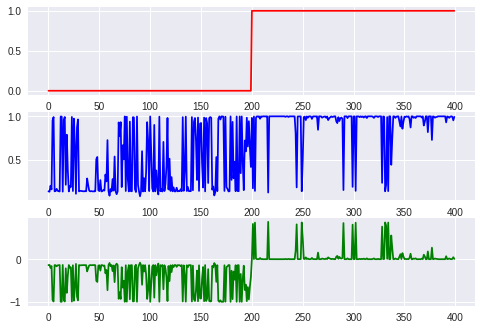

In [42]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [0]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '{}-{}_{}_{}.h5'.format('A1', 'A5', pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save('gdrive/My Drive/Colab/Model/{}'.format(modelSaved))
    np.save('gdrive/My Drive/Colab/Model/{}'.format(meanSaved), trainMean)
    np.save('gdrive/My Drive/Colab/Model/{}'.format(stdSaved), trainStd)

Save Model as 'A1-A5_InceptionV3_11-19-12:19:05.h5'? (y/n)
n
